# TP - Evaluation d'hypothèse et Validation Croisée

Dans ce TP vous devrez implémenter des procédures d'évaluation de classifieurs. Vous utiliserez pour cela le classifieur des k-plus-proches voisins, déjà implémenté dans la librairie `scikit-learn`, et vous l'appliquerez sur des données décrivant des voitures (`
Auto2.csv`)

### D'abord, chargeons les données

Les données décrivent des voitures.
On a des variables comme le poids de la voiture, son accelération, etc...
et on cherche à prédire sa cylindrée, qui peut être 2, 4, 6 ou 8 cylindres

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Pour charger les données depuis un fichier csv, on utilise un module python qui s'appelle `pandas`.

In [2]:
import pandas
autos = pandas.read_csv( "Auto2.csv")
autos.drop(labels=['name','origin'],axis=1,inplace=True)
autos = autos[autos.cylinders != 3]
autos = autos[autos.cylinders != 5]
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,29.0,4,85.0,52.0,2035,22.2,76
1,29.9,4,98.0,65.0,2380,20.7,81
2,23.0,4,140.0,78.0,2592,18.5,75
3,27.2,4,141.0,71.0,3190,24.8,79
4,28.0,4,151.0,90.0,2678,16.5,80


maintenant, on converti ces données en tableaux numpy:
* `X` sera le tableau de données à 5 variables
* la cylindrée sera stockée dans `y`

In [3]:
X = autos[['mpg','displacement','weight','acceleration','year']].values
y = autos[['cylinders']].values.squeeze()

comme les données ont des échelles très différentes selon les variables, on va normaliser par variable (donc diviser chaque variable par son écart-type). Si on ne normalisait pas, alors le poids dominerait les autres variables lors du calcul de la distance dans l'algorithme des k-ppv

In [4]:
X = X / np.std(X,axis=0)

In [5]:
print('X=',X,'\ny=',y[:20])

X= [[ 3.70525275  0.81270333  2.38523624  8.06883579 20.61151225]
 [ 3.82024335  0.93699913  2.7896129   7.52364418 21.9675328 ]
 [ 2.93864873  1.33857019  3.03809942  6.72402983 20.34030815]
 ...
 [ 3.57748541  1.02305007  2.88806982  5.63364661 20.61151225]
 [ 2.61923039  2.20864081  4.01446394  6.14249211 20.88271636]
 [ 2.42757939  1.14734587  3.83278747  7.95979747 20.61151225]] 
y= [4 4 4 4 4 4 8 4 6 8 4 8 8 8 8 6 6 8 8 8]


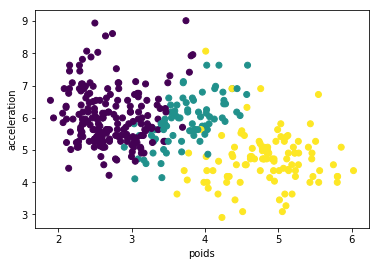

In [6]:
# Affichons les points de X, en utilisant seulement les 3ieme et 4ieme colonnes de X.
plt.scatter(X[:,2],X[:,3],c=y)
plt.xlabel('poids')
plt.ylabel('acceleration');

### Ensuite, voici quelques éléments de python+numpy dont vous aurez besoin pour ce TP

In [7]:
# Comparer des tableaux numpy, et calculer le nombre d'elements differents
a = np.array([10,20,30,40,50,60])
b = np.array([10,20,40,30,40,30])

d = (a != b)
print('d=',d)

e = d.astype(int)
print('e=',e)

print('nombre de uns=',np.sum(e))

d= [False False  True  True  True  True]
e= [0 0 1 1 1 1]
nombre de uns= 4


In [8]:
# Enlever un element du tableau (ou une ligne d'un tableau 2D)
a2 = np.delete(a,3)
print('voici le tableau a sans son quatrieme element : ',a2)
print("notez que tableau a n'a pas changé : ",a)

voici le tableau a sans son quatrieme element :  [10 20 30 50 60]
notez que tableau a n'a pas changé :  [10 20 30 40 50 60]


### Pour le classifieur, on utilisera les k-plus proches voisins, implémenté dans `scikit-learn`

In [9]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [10]:
# Créeons un `classifieur` qui calculera les 3 plus proches voisins d'un nouveau points
# en prenant des voisins parmis tous les exemples de X
classifieur = KNeighborsClassifier(n_neighbors=3).fit(X,y)

In [11]:
# On voudrait prédire la classe de l'exemple Z
# on appelle donc la fonction predict qui va chercher ses 3 plus proches voisins
# renvoyer la classe majoritaire
Z = np.array([2,3,2,1,7])
print('prediction pour Z = ',classifieur.predict([Z]))

prediction pour Z =  [8]


In [12]:
# Je peux aussi calculer des prédictions pour plusieurs exemples à la fois.
# par exemple ici, je calcule les prédictions des 5 premiers exemples de X
print('prediction pour les cinq premiers exemples de X = ',classifieur.predict(X[:5]))

prediction pour les cinq premiers exemples de X =  [4 4 4 4 4]


### Sujet du TP

Avant tout, on va mélanger les données avec la commande `X,y = shuffle(X,y)`. Cette commande provient du module python `scikit-learn`

* Commencez par ecrire une fonction `calcul_erreur_empirique(X,y,k)` qui calcule l'erreur empirique du k-ppv sur l'ensemble des données `X,y`
* Pour différentes valeurs de k (par exemple, k=1..15), vous afficherez le graphique de l'erreur empirique du k-ppv sur les données de ce TP
* Ecrivez une fonction `calcule_erreur(X_train,y_train,X_test,y_test,k)` qui prenne en entrée deux tableaux de données, deux tableaux d'étiquette et une valeur k. Cette fonction doit renvoyer l'erreur empirique du k-ppv calculée sur `X_test,y_test`, mais en utilisant les voisins pris sur `X_train`. Cette fonction sera utilisée dans la question suivante pour appliquer le `hold_out`.
* Implémentez la procédure de `hold_out`: Pour différentes valeurs de `k`, vous calculerez l'erreur sur un ensemble de test comportant 30% des données, et vous calculerez aussi l'erreur empirique sur les 70% restants. Vous afficherez sur un graphique ces deux erreurs, en fonction de k. N'oubliez pas d'appeler la fonction `shuffle` au début de votre fonction, pour bien mélanger les données.
* Relancez plusieurs fois le calcul du `hold_out` et comparez les résultats obtenus. Normalement, ces résultats devraient varier grandement. Pouvez-vous expliquer pourquoi ?
* Implémentez la méthode `leave-one-out`, et expliquez pourquoi cette méthode est pertinente ici.
* Comparer les résultats du `leave-one-out` et du `hold-out`.

### Visualisation du classifieur


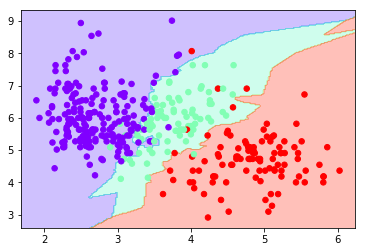

In [13]:
# On peut chercher à visualiser le classifieur k-ppv, sur les colones 2 et 3
# pour ce faire, lancez ce code

def visualize_kppv_classifier(X, y,**kwargs):
    X = X[:,2:4]

    classifieur_visu = KNeighborsClassifier(n_neighbors=3).fit(X,y)
    def predict(x): return classifieur_visu.predict(x)

    
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    if predict:
        xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                             np.linspace(*ylim, num=200))
        xxyy   = np.c_[xx.ravel(), yy.ravel()]
        Z      = np.array([predict([d])
                           for d in xxyy]).reshape(xx.shape)

        # Create a color plot with the results
        n_classes = len(np.unique(y))
        contours = ax.contourf(xx, yy, Z, alpha=0.3,
                               cmap='rainbow')

        ax.set(xlim=xlim, ylim=ylim)

        
visualize_kppv_classifier(X,y)

[[ 4.35686617  0.87007062  2.32663092  5.81537715 21.9675328 ]
 [ 1.66097537  3.34642547  5.27682238  4.90672447 19.52669582]
 [ 3.94801069  1.00392764  2.61379696  5.27018554 21.15392047]
 ...
 [ 3.06641607  1.08041737  2.78023605  5.45191608 18.9842876 ]
 [ 2.54256999  2.48591606  3.94413756  5.63364661 21.15392047]
 [ 1.66097537  3.82448625  5.23228234  4.36153286 19.79789993]] [4 8 4 6 4 4 6 4 4 6 4 4 8 4 4 4 4 8 6 4 4 4 8 6 4 4 4 8 8 4 6 4 8 8 6 8 4
 8 4 4 4 4 8 4 4 6 4 4 4 4 4 6 8 4 4 8 4 6 6 4 8 4 4 4 4 4 8 4 8 8 4 8 4 8
 4 4 8 4 4 8 4 6 4 8 6 8 8 8 6 6 4 4 4 8 4 8 8 8 6 4 8 4 6 4 4 4 8 4 4 4 8
 6 4 4 8 4 4 4 4 8 4 4 8 4 6 6 4 6 4 8 6 8 4 6 4 4 4 4 4 4 8 4 6 8 4 4 4 4
 4 8 4 8 4 6 6 8 4 4 4 4 4 6 4 6 4 4 4 4 4 8 4 8 6 6 8 4 4 4 6 8 4 4 4 6 6
 4 6 4 8 6 8 4 4 4 4 8 4 4 4 6 4 8 8 4 6 6 8 8 4 8 8 4 6 6 6 8 6 6 6 4 4 4
 6 4 4 4 4 6 4 8 8 6 4 6 6 8 4 4 4 6 8 6 8 4 6 8 4 4 6 4 8 8 4 4 4 4 8 6 8
 8 4 4 8 6 8 4 4 4 6 8 4 8 6 4 4 8 8 4 4 4 6 4 6 8 8 6 6 4 4 6 4 8 8 4 6 4
 4 8 4 4 6 4 6 8

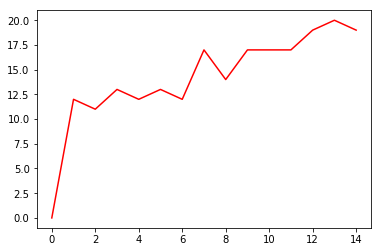

In [14]:
X,y=shuffle(X,y)
print(X,y)
def calcul_erreur_empirique(X,y,k):
    Cla=KNeighborsClassifier(n_neighbors=k).fit(X,y)
    r=Cla.predict(X)
    e=(r!=y)
    diff_int=e.astype(int)
    nb_err=np.sum(diff_int)
    return nb_err
tab_err=np.zeros((1,15))
for i in range(1,16):
    tab_err[0,i-1]=calcul_erreur_empirique(X,y,i)
plt.plot(tab_err.T,"red")
plt.show()    



In [46]:

for i in range(1,15):
    print("erreur empirique : ", calcul_erreur_empirique(X,y,i))


erreur empirique :  0
erreur empirique :  12
erreur empirique :  11
erreur empirique :  13
erreur empirique :  12
erreur empirique :  13
erreur empirique :  12
erreur empirique :  17
erreur empirique :  14
erreur empirique :  17
erreur empirique :  17
erreur empirique :  17
erreur empirique :  19
erreur empirique :  20


In [51]:
def calcul_erreur_empiriquebis(X_train,y_train,X_test,y_test,k):
    Cla=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    r=Cla.predict(X_test)
    e=(r!=y_test)
    diff_int=e.astype(int)
    nb_err=np.sum(diff_int)
    return nb_err
calcul_erreur_empiriquebis(X_train,y_train,X_test,y_test,117)    
    

0

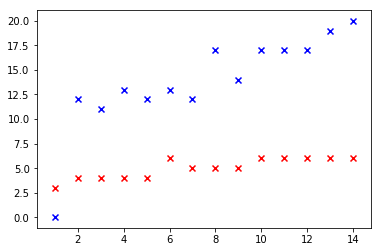

In [70]:
X,y = shuffle(X,y)
def holdout(X,y):
    tailleX=X.shape[0]
    tailleXtest=int(tailleX*(30/100))
    X_test=X[:tailleXtest]
    X_train=X[tailleXtest:]
    y_test=y[:tailleXtest]
    y_train=y[tailleXtest:]
    Lk=[]
    errk=[]
    errk1=[]
    color="red"
    color1="blue"
    for i in range (1,15):
        Lk.append(i)
        errk.append(calcul_erreur_empiriquebis(X_train,y_train,X_test,y_test,i))
        errk1.append(calcul_erreur_empirique(X,y,i))
    plt.scatter(Lk,errk,c=color,marker='x')
    plt.scatter(Lk,errk1,c=color1,marker='x')
    
    
holdout(X,y)

In [72]:
from sklearn.model_selection import LeaveOneOut
Loo=LeaveOneOut()
Loo.get_n_splits(X)
for train_index,test_index in Loo.split(X):
    print("train : ", train_index,"validation : ",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
print(X_train, X_test, y_train, y_test)
    
    

train :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

train :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

train :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2